<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/DolBaKi/8-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

###패숀 MNIST 불러오기

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

In [6]:
model.add(keras.layers.MaxPooling2D(2))

In [7]:
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [8]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

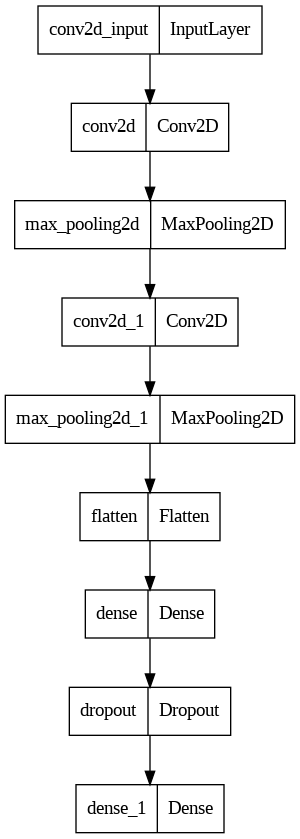

In [10]:
keras.utils.plot_model(model)

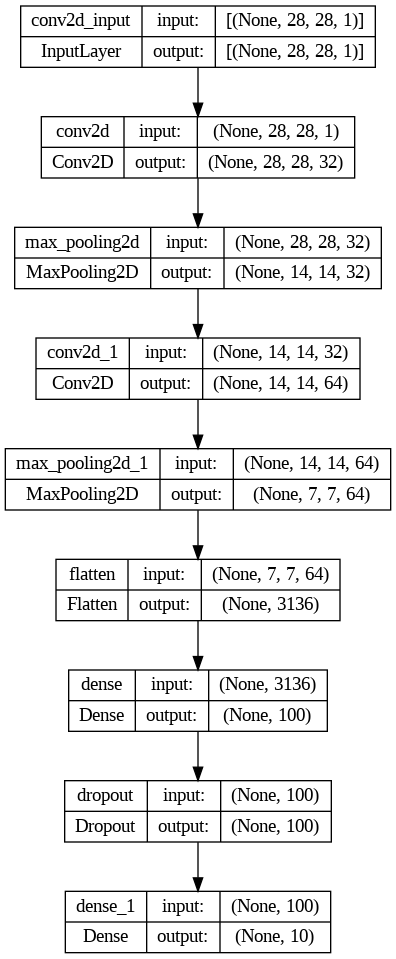

In [12]:
keras.utils.plot_model(model,show_shapes=True) # 입력과 출력의 크기 표시

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 134s 88ms/step - loss: 0.5087 - accuracy: 0.8173 - val_loss: 0.3162 - val_accuracy: 0.8830
Epoch 2/20
1500/1500 [==============================] - 112s 74ms/step - loss: 0.3377 - accuracy: 0.8781 - val_loss: 0.2730 - val_accuracy: 0.8965
Epoch 3/20
1500/1500 [==============================] - 75s 50ms/step - loss: 0.2906 - accuracy: 0.8958 - val_loss: 0.2436 - val_accuracy: 0.9097
Epoch 4/20
1500/1500 [==============================] - 74s 50ms/step - loss: 0.2574 - accuracy: 0.9063 - val_loss: 0.2341 - val_accuracy: 0.9137
Epoch 5/20
1500/1500 [==============================] - 72s 48ms/step - loss: 0.2346 - accuracy: 0.9136 - val_loss: 0.2307 - val_accuracy: 0.9153
Epoch 6/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.2130 - accuracy: 0.9222 - val_loss: 0.2154 - val_accuracy: 0.9209
Epoch 7/20
1500/1500 [==============================] - 73s 49ms/step - loss: 0.1978 - accuracy: 0.9272 - val_loss: 0.2241

<function matplotlib.pyplot.show(close=None, block=None)>

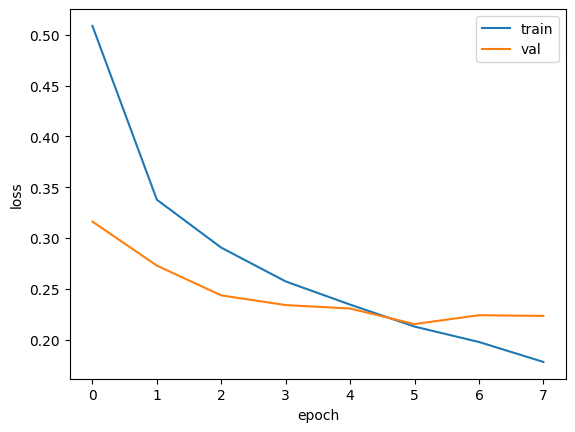

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show

In [15]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 5s 12ms/step - loss: 0.2154 - accuracy: 0.9209


[0.21544331312179565, 0.9209166765213013]

<function matplotlib.pyplot.show(close=None, block=None)>

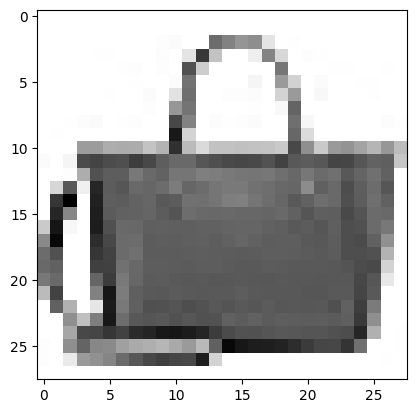

In [16]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show

In [17]:
preds=model.predict(val_scaled[0:1])

1/1 [==============================] - 1s 510ms/step


<BarContainer object of 10 artists>

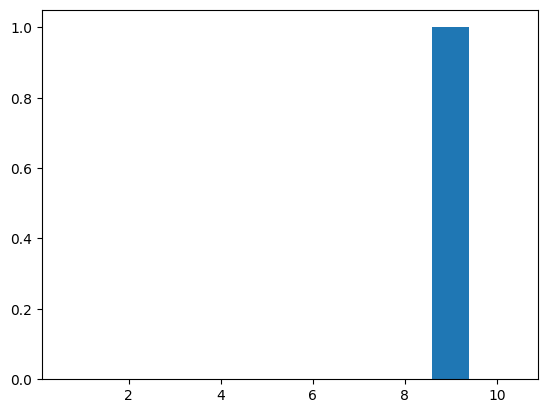

In [18]:
plt.bar(range(1,11),preds[0])

In [19]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [21]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [22]:
test_scaled=test_input.reshape(-1,28,28,1)/255

In [23]:
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 5s 15ms/step - loss: 0.2381 - accuracy: 0.9138


[0.2380589097738266, 0.9138000011444092]

###결과
 * 합성곱 신경망은 아직 더 배워야 할 필요가 있음
 * 입력과 가중치 곱하고 절편을 더하는 선형 계산이 합성곱
 * 필터가 뉴런에 해당
 * 특성 맵이 풀링 층 출력 배열
 * 스트라이더는 보통 1
 * 풀링은 최대풀링과 평균풀링으로 나뉨